### Figure 5: remaze analyses

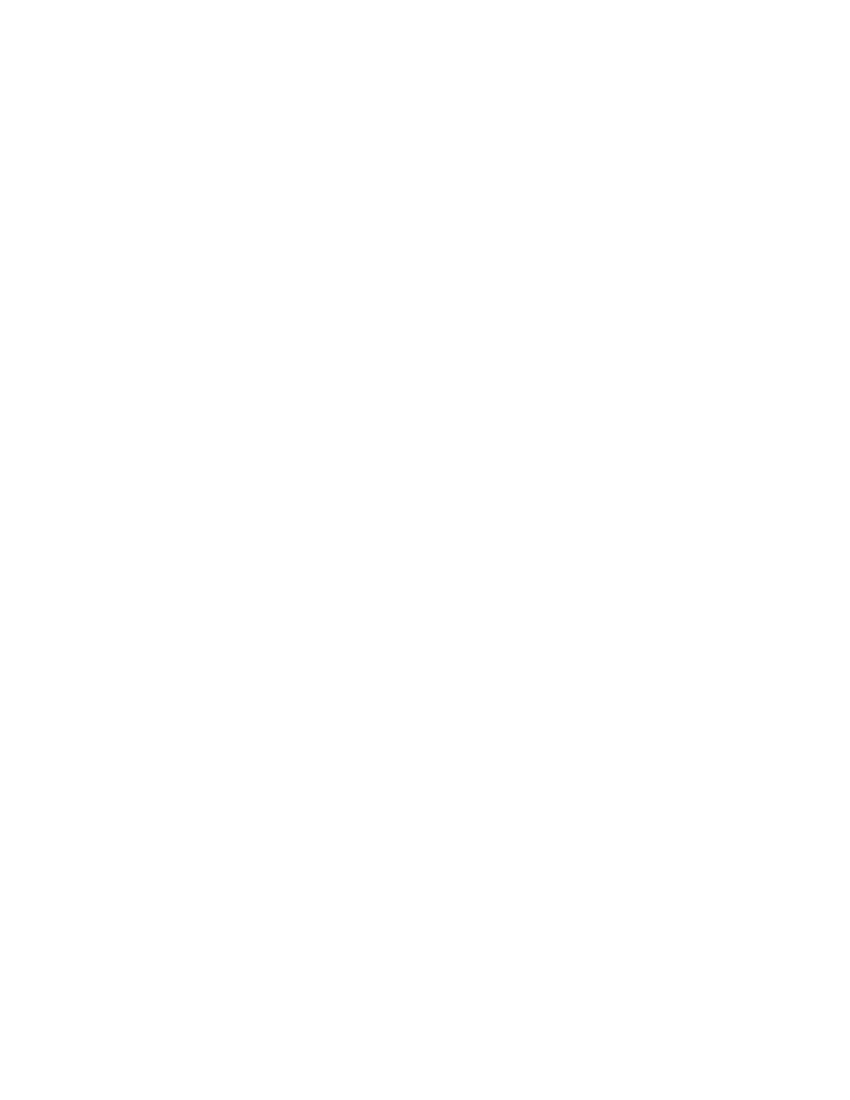

In [249]:
%matplotlib widget
import matplotlib.pyplot as plt
import numpy as np
import subjects
from subjects import sd_span, nsd_span, grp_span
import pandas as pd
import seaborn as sns
from neuropy.plotting import Fig
from scipy import stats

scatter_kw=dict(rasterized=True,s=8,edgecolors='w',linewidths=0.6)

grpdata = subjects.GroupData()
group = ["NSD", "SD"]

# remaze_ev
corr_sess = grpdata.remaze_corr_across_session
corr_maze_remaze =grpdata.remaze_maze_paircorr
corr_first5h_remaze =grpdata.remaze_first5_paircorr
corr_last5h_remaze =grpdata.remaze_last5_paircorr
corr_first5_last5 =grpdata.post_first5_last5_paircorr
colors_scatter= subjects.colors_sd(1.2)
ev_df = grpdata.remaze_ev

# remaze temporal bias

bias_df = grpdata.remaze_temporal_bias
colors_bias = subjects.colors_sd(1.2)
tb_com = grpdata.remaze_temporal_bias_com_correlation_across_session


# ensembles
ensemble_corr = grpdata.remaze_ensemble_corr_across_sess
ensemble_activation = grpdata.remaze_ensemble_activation_across_sess
activation_df = grpdata.remaze_activation_of_maze

fig = Fig(grid=(5, 4), hspace=0.45, wspace=0.3)
filename = subjects.figpath_sd / "figure5"
caption = "hello"


### correlation across session

In [250]:

for i,corr in enumerate(corr_sess):
    np.fill_diagonal(corr,0) 
    ax = fig.subplot(fig.gs[0,i])
    ax.imshow(corr_sess[i],cmap='jet',origin='lower',aspect='auto')
    ax.axis('off')
fig.panel_label(ax,'A')

### paircorr maze vs remaze

In [251]:

for i, grp in enumerate(['NSD','SD']):
    ax = fig.subplot(fig.gs[0,i+2])
    df = corr_maze_remaze[corr_maze_remaze['grp']==grp]
    linreg = stats.linregress(df['maze'],df['remaze'])

    ax.scatter(df['maze'],df['remaze'],c=colors_scatter[i],**scatter_kw)
    ax.plot(df['maze'],linreg.intercept + linreg.slope*df['maze'],'gray')
    ax.set_title(f'r={linreg.rvalue.round(2)}')
    ax.set_xlim([-0.2,0.7])
    ax.set_ylim([-0.2,0.7])
    ax.set_xlabel('Maze')
    ax.set_ylabel('Remaze')



### paircorr first5h vs remaze

In [252]:

for i, grp in enumerate(['NSD','SD']):
    ax = fig.subplot(fig.gs[1,i])
    df = corr_first5h_remaze[corr_first5h_remaze['grp']==grp]
    linreg = stats.linregress(df['e1'],df['e2'])

    ax.scatter(df['e1'],df['e2'],c=colors_scatter[i],**scatter_kw)
    ax.plot(df['e1'],linreg.intercept + linreg.slope*df['e1'],'gray')
    ax.set_title(f'r={linreg.rvalue.round(2)}')
    ax.set_xlim([-0.15,0.55])
    ax.set_ylim([-0.15,0.55])
    ax.set_xlabel('Zt0-5')
    ax.set_ylabel('Remaze')



### paircorr last5h vs remaze

In [253]:

for i, grp in enumerate(['NSD','SD']):
    ax = fig.subplot(fig.gs[1,i+2])
    df = corr_last5h_remaze[corr_last5h_remaze['grp']==grp]
    linreg = stats.linregress(df['e1'],df['e2'])

    ax.scatter(df['e1'],df['e2'],c=colors_scatter[i],**scatter_kw)
    ax.plot(df['e1'],linreg.intercept + linreg.slope*df['e1'],'gray')
    # ax.hexbin(df['e1'],df['e2'])
    ax.set_title(f'r={linreg.rvalue.round(2)}')
    ax.set_xlim([-0.1,0.5])
    ax.set_ylim([-0.1,0.5])
    ax.set_xlabel('Zt5-end')
    ax.set_ylabel('Remaze')



### paircorr first5 vs last5

In [254]:

for i, grp in enumerate(['NSD','SD']):
    ax = fig.subplot(fig.gs[2,i])
    df = corr_first5_last5[corr_first5_last5['grp']==grp]
    linreg = stats.linregress(df['e1'],df['e2'])

    ax.scatter(df['e1'],df['e2'],c=colors_scatter[i],**scatter_kw)
    ax.plot(df['e1'],linreg.intercept + linreg.slope*df['e1'],'gray')
    # ax.hexbin(df['e1'],df['e2'])
    ax.set_title(f'r={linreg.rvalue.round(2)}')
    ax.set_xlim([-0.1,0.5])
    ax.set_ylim([-0.1,0.5])
    ax.set_xlabel('Zt0-5')
    ax.set_ylabel('Zt5-end')



### ev

### temporal bias maze vs remaze

### maze activation on remaze

### temporal bias COM across sesssion

### Ensemble correlation across sesssion

### Ensemble activation across sesssion

### saving

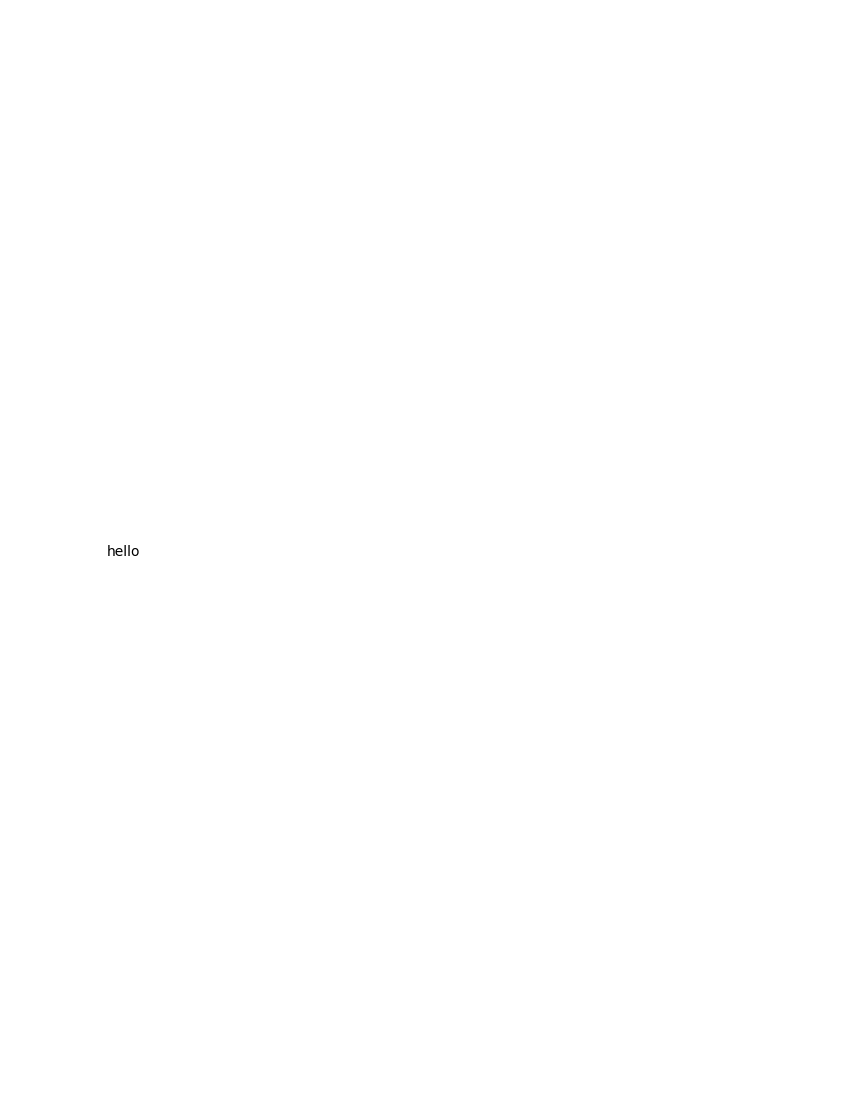

In [255]:
fig.savefig(filename,caption=caption)